In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras. layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam, RMSprop, SGD
import tensorflow as tf

warnings.filterwarnings('ignore') # Turn the warnings off.
%matplotlib inline


In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [ ]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


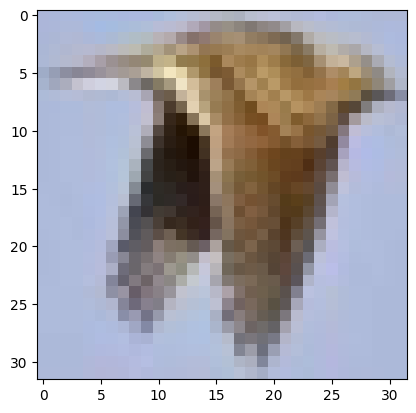

[2]


In [ ]:
i_image = 123
plt.imshow(X_train[i_image, :, :])
plt.show()
print(y_train[123])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [ ]:
y = np.concatenate([y_train,y_test],axis=0)
y = tf.keras.utils.to_categorical (y, 10)
y_train = y[:n_train_size, :]
y_test = y[n_train_size:,:]

In [ ]:
drop_prob = 0.7
my_model = Sequential()
#1st convolution + pooling.
my_model.add(Conv2D(input_shape=(32, 32,3), filters=32,kernel_size=(5,5) ,padding = "same", activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

#2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding="same", activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

#Flattened fully connected layer.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))

#Apply dropout.
my_model.add (Dropout (rate=drop_prob))

#Output layer.
my_model.add(Dense(units = 10, activation="softmax"))

In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
n_epochs = 20
batch_size = 20
learn_rate = 0.0001

In [ ]:
my_optimizer = Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics = ["accuracy"])

In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)

Epoch 1/20
2000/2000 [==============================] - 19s 5ms/step - loss: 1.6902 - accuracy: 0.3852 - val_loss: 1.4199 - val_accuracy: 0.5022
Epoch 2/20
2000/2000 [==============================] - 9s 5ms/step - loss: 1.3696 - accuracy: 0.5099 - val_loss: 1.2421 - val_accuracy: 0.5654
Epoch 3/20
2000/2000 [==============================] - 9s 5ms/step - loss: 1.2334 - accuracy: 0.5618 - val_loss: 1.1482 - val_accuracy: 0.6031
Epoch 4/20
2000/2000 [==============================] - 9s 5ms/step - loss: 1.1353 - accuracy: 0.5995 - val_loss: 1.0641 - val_accuracy: 0.6272
Epoch 5/20
2000/2000 [==============================] - 9s 5ms/step - loss: 1.0574 - accuracy: 0.6259 - val_loss: 1.0189 - val_accuracy: 0.6409
Epoch 6/20
2000/2000 [==============================] - 9s 5ms/step - loss: 0.9931 - accuracy: 0.6524 - val_loss: 1.0167 - val_accuracy: 0.6508
Epoch 7/20
2000/2000 [==============================] - 9s 5ms/step - loss: 0.9391 - accuracy: 0.6709 - val_loss: 0.9477 - val_accuracy

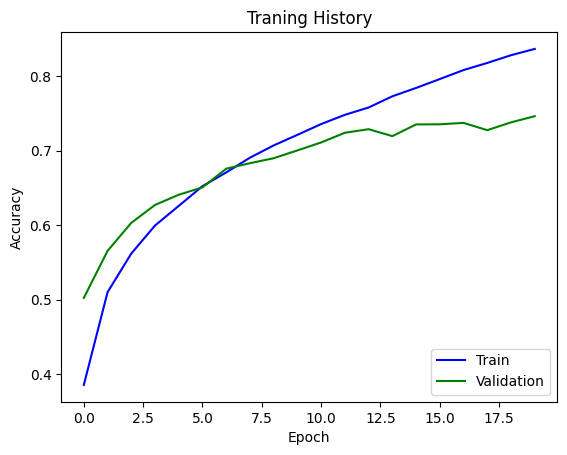

In [ ]:
n_skip = 0
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Traning History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'lower right')

In [ ]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {}".format(np.round(ACC, 3)))

Test Accuracy: 0.117


In [ ]:
ACC = my_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3038 - accuracy: 0.1174
